In [24]:
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df_tesla = pd.read_csv('./data/TESLA Search Trend vs Price.csv')

df_btc_search = pd.read_csv('./data/Bitcoin Search Trend.csv')
df_btc_price = pd.read_csv('./data/Daily Bitcoin Price.csv')

df_unemployment = pd.read_csv('./data/UE Benefits Search vs UE Rate 2004-19.csv')

Tesla

In [8]:
#df_tesla

print(df_tesla.shape)
df_tesla.head()

(124, 3)


,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


df_tesla 데이터프레임은 124행과 3열로, 월별 검색 인기도와 테슬라 주식 종가가 나타나있다.

In [6]:
df_tesla.describe()

,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
count,124.000000,124.000000
mean,8.725806,50.962145
std,5.870332,65.908389
min,2.000000,3.896000
25%,3.750000,7.352500
50%,8.000000,44.653000
75%,12.000000,58.991999
max,31.000000,498.320007


Unemployment

In [13]:
# df_unemployment

print(df_unemployment.shape)
df_unemployment.head()

(181, 3)


,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,34,5.7
1,2004-02,33,5.6
2,2004-03,25,5.8
3,2004-04,29,5.6
4,2004-05,23,5.6


실업 데이터프레임에는 181개의 행과 3개의 열이 있다. 테슬라와 마찬가지로 2004년부터 월별 데이터가 행별로 정리되어 있다.

In [10]:
df_unemployment.describe()

,UE_BENEFITS_WEB_SEARCH,UNRATE
count,181.000000,181.000000
mean,35.110497,6.217680
std,20.484925,1.891859
min,14.000000,3.700000
25%,21.000000,4.700000
50%,26.000000,5.400000
75%,45.000000,7.800000
max,100.000000,10.000000


Bitcoin

In [14]:
# df_btc_price

# 비트코인의 일별 종가와 거래량
print(df_btc_price.shape)
df_btc_price.head()

(2204, 3)


,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [15]:
# 구글 트렌드에서 나온 월별 검사량
print(df_btc_search.shape)
df_btc_search.head()

(73, 2)


,MONTH,BTC_NEWS_SEARCH
0,2014-09,5
1,2014-10,4
2,2014-11,4
3,2014-12,4
4,2015-01,5


데이터프레임에서 구글의 검색 관심도 범위는 0에서 100 사이라는 점을 알 수 있다.

구글이 검색 관심도 값을 정의하는 법
- 주어진 지역 및 시간에 대한 차트상의 최대치에 대한 상대적 검색 관심도를 나타낸다.100의 값은 용어의 관심도가 가질 수 있는 최고치이다. 50의 값은 중간 정도 인기가 있음을 의미한다. 0점은 이 용어에 대한 충분한 데이터가 없음을 의미한다.

# 데이터 정리 - 시계열 데이터를 다시 샘플링 하기

### 도전

4개의 데이터 프레임을 모두 조사하여 누락된 값 또는 NaN값이 몇 개인지 찾고, 값이 누락된 행을 찾는다. 마지막으로 누락된 값이 포함된 행을 모두 제거한다.

In [16]:
df_tesla.isna()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
119,False,False,False
120,False,False,False
121,False,False,False
122,False,False,False


In [17]:
df_tesla.isna().values.any()

False

In [18]:
df_btc_price.isna().values.any()

True

In [19]:
df_btc_search.isna().values.any()

False

In [20]:
df_unemployment.isna().values.any()

False

비트코인 가격 데이터에 누락된 값이 있다는 걸 알 수 있다.

In [21]:
df_btc_price.isna().values.sum()

2

누락된 값은 2개이고, 제거하기 위해 .dropna() 사용

In [23]:
df_btc_price = df_btc_price.dropna()

# df_btc_price.dropna(inplace = True) 
# inplace 인수 사용하면 데이터프레임 덮어쓰기 가능

### 도전

데이터프레임에서 MONTH 또는 DATE열의 데이터 유형 살펴보기. 문자열을 찾으면 이를 모두 Datetime 객체로 변환

In [30]:
df_tesla.head()

,MONTH,TSLA_WEB_SEARCH,TSLA_USD_CLOSE
0,2010-06-01,3,4.766
1,2010-07-01,3,3.988
2,2010-08-01,2,3.896
3,2010-09-01,2,4.082
4,2010-10-01,2,4.368


In [29]:
df_btc_price.head()

,DATE,CLOSE,VOLUME
0,2014-09-17,457.334015,21056800.0
1,2014-09-18,424.440002,34483200.0
2,2014-09-19,394.795990,37919700.0
3,2014-09-20,408.903992,36863600.0
4,2014-09-21,398.821014,26580100.0


In [31]:
df_tesla.MONTH = pd.to_datetime(df_tesla.MONTH)
df_btc_price.DATE = pd.to_datetime(df_btc_price.DATE)
df_btc_search.MONTH = pd.to_datetime(df_btc_search.MONTH)
df_unemployment.MONTH = pd.to_datetime(df_unemployment.MONTH)

In [32]:
df_btc_price.DATE.head()

0   2014-09-17
1   2014-09-18
2   2014-09-19
3   2014-09-20
4   2014-09-21
Name: DATE, dtype: datetime64[ns]

In [33]:
df_btc_search.MONTH.head()

0   2014-09-01
1   2014-10-01
2   2014-11-01
3   2014-12-01
4   2015-01-01
Name: MONTH, dtype: datetime64[ns]

비트코인 가격은 일별 데이터지만 비트코인 검색 인기도는 월별 데이터다. 
일별 데이터를 월별 데이터로 변환해준다.

매월 마지막으로 이용 가능한 가격, 즉 해당 월말의 가격으로 변환한다.

In [34]:
df_btc_monthly = df_btc_price.resample('M', on = 'DATE').last()

C:\Users\LG\AppData\Local\Temp\ipykernel_25560\2908903137.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_btc_monthly = df_btc_price.resample('M', on = 'DATE').last()


In [35]:
print(df_btc_monthly.shape)
df_btc_monthly.head()

(73, 2)


,CLOSE,VOLUME
DATE,,
2014-09-30,386.944000,34707300.0
2014-10-31,338.321014,12545400.0
2014-11-30,378.046997,9194440.0
2014-12-31,320.192993,13942900.0
2015-01-31,217.464005,23348200.0


가격데이터에 73행이 있다. 이는 검색 데이터와 동일한 결과이다.

# 데이터 시각화 - 맷플롯립을 이용한 테슬라 선형 차트

테슬라 주가와 검색 인기도에 대한 기본 꺾은선 차트를 만든 다음, 차트에 스타일 추가

### 도전

선형 차트에 두 개의 축을 이용하여 테슬라 검색량에 대비한 테슬라 주가 표시

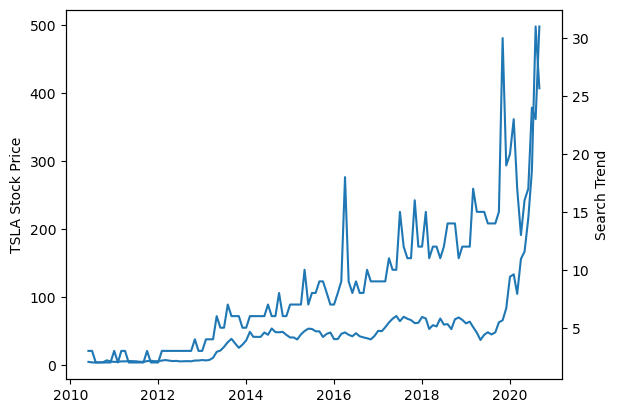

In [38]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price')
ax2.set_ylabel('Search Trend')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH)

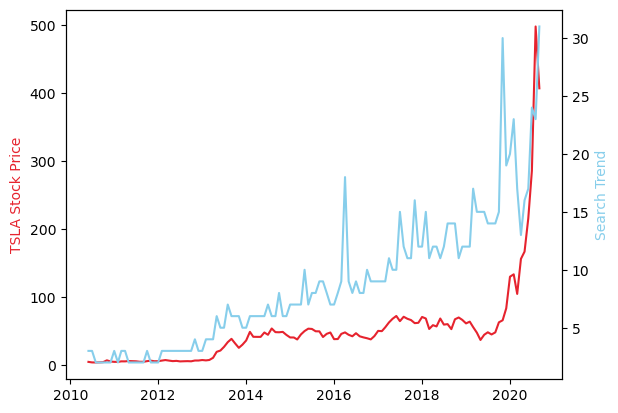

In [39]:
ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color = '#E6232E')
ax2.set_ylabel('Search Trend', color = 'skyblue')

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = '#E6232E')
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color = 'skyblue')

### 도전
1. 그림 크기 확대 (14:8)
2. 레이블 글자 크기와 x축의 눈금 표시를 14로 확대
3. x축에 있는 텍스트를 45도 회전
4. 차트 제목 달기 : 테슬라 웹 검색 대 주가
5. 차트의 선 굵기를 더 굵게
6. 인치 당 도트 수 즉 DPI value값을 변경하여 차트를 선병하게 보이도록 유지
7. y축과 x축 값에 최대값, 최소값을 설정
8. plt.show()를 사용하여 자동 노트북 출력에 의존하는 대신 셀 아래 차트를 표시

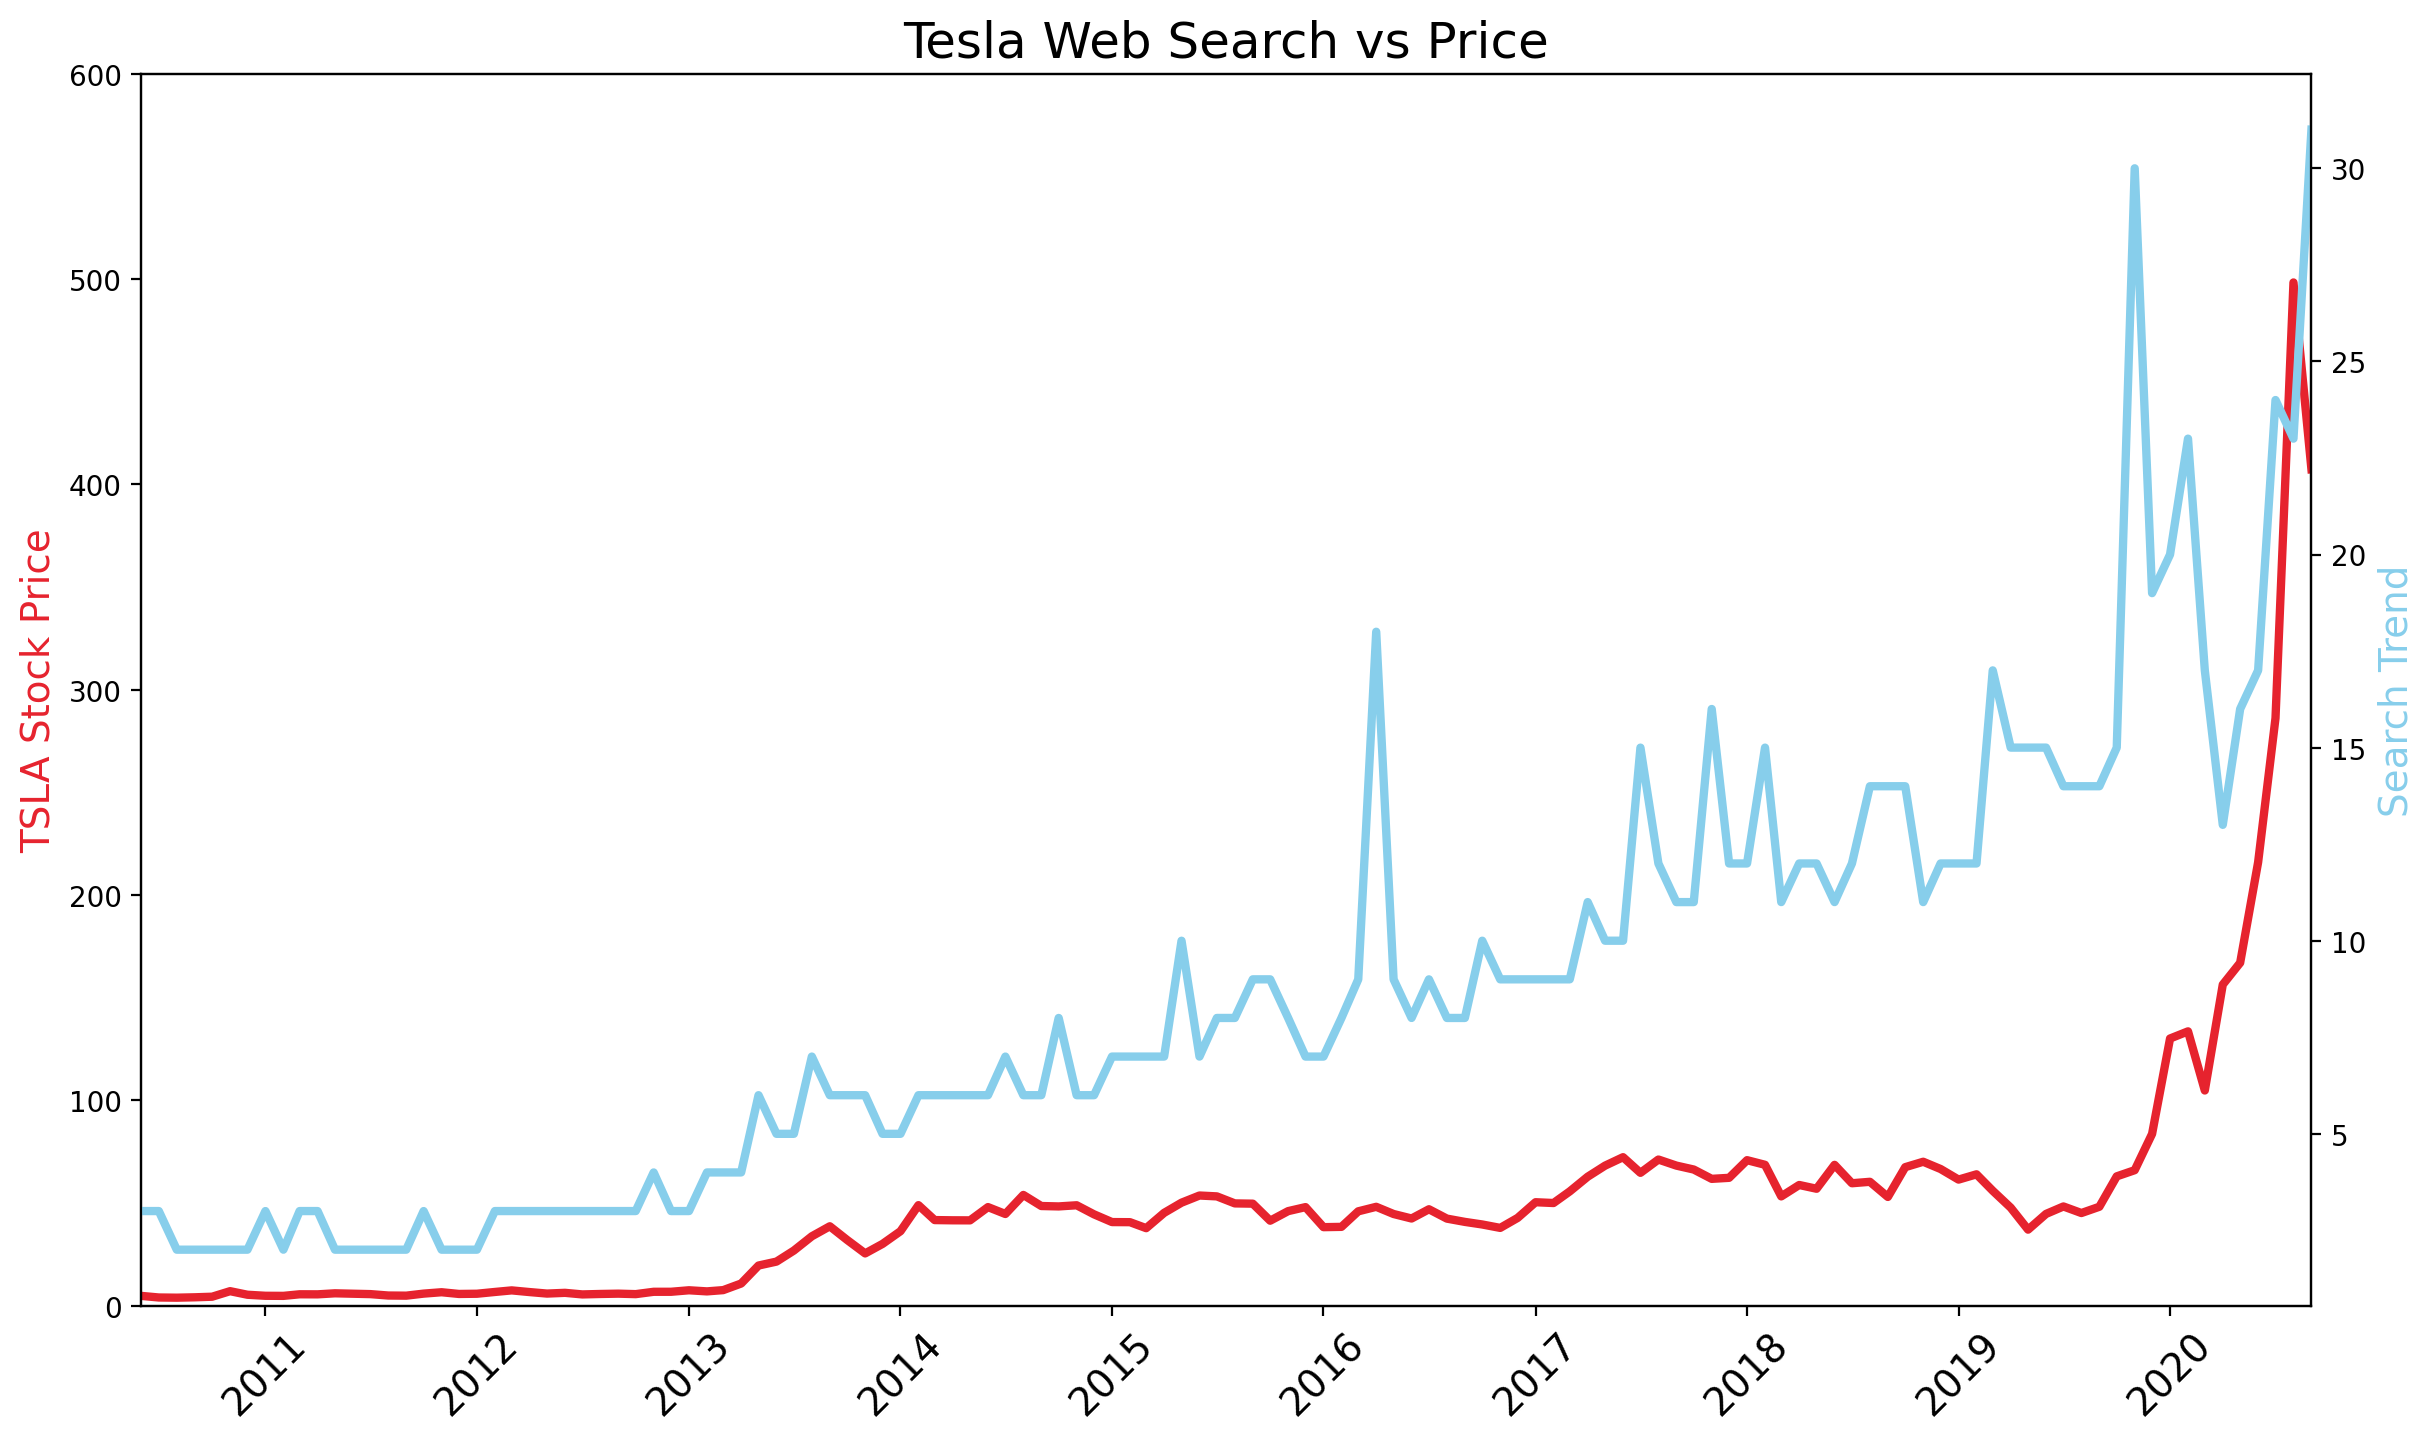

In [44]:
plt.figure(figsize = (14, 8), dpi = 200)
plt.title('Tesla Web Search vs Price', fontsize = 18)

plt.xticks(fontsize = 14, rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('TSLA Stock Price', color = '#E6232E', fontsize = 14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize = 14)

ax1.set_ylim([0, 600])
ax2.set_xlim([df_tesla.MONTH.min(), df_tesla.MONTH.max()])

ax1.plot(df_tesla.MONTH, df_tesla.TSLA_USD_CLOSE, color = '#E6232E', linewidth = 3)
ax2.plot(df_tesla.MONTH, df_tesla.TSLA_WEB_SEARCH, color = 'skyblue', linewidth = 3)

plt.show()

# 로케이터와 데이트포매터를 사용하여 타임라인에 눈금 표시

In [42]:
import matplotlib.dates as mdates

In [43]:
years = mdates.YearLocator()
months = mdates.MonthLocator()
year_fmt = mdates.DateFormatter('%Y')

In [50]:
# format the ticks
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)

# 데이터 시각화 - 비트코인 : 선 스타일과 마커

### 과제
1. 차트 제목을 '비트코인 뉴스 검색 대 리샘플링 가격'으로 수정
2. y축 레이블을 'BTC가격'으로 변경
3. x,y축 한계를 바꿔서 외관을 개선
4. btc종가의 선 종류를 점선으로 
5. 검색 데이터포인트의 마커 형태를 작은 원으로 만들기
6. 비트코인 검색이 크게 증가한 원인에는 비트코인의 가격상승이 포함됨을 나타내기

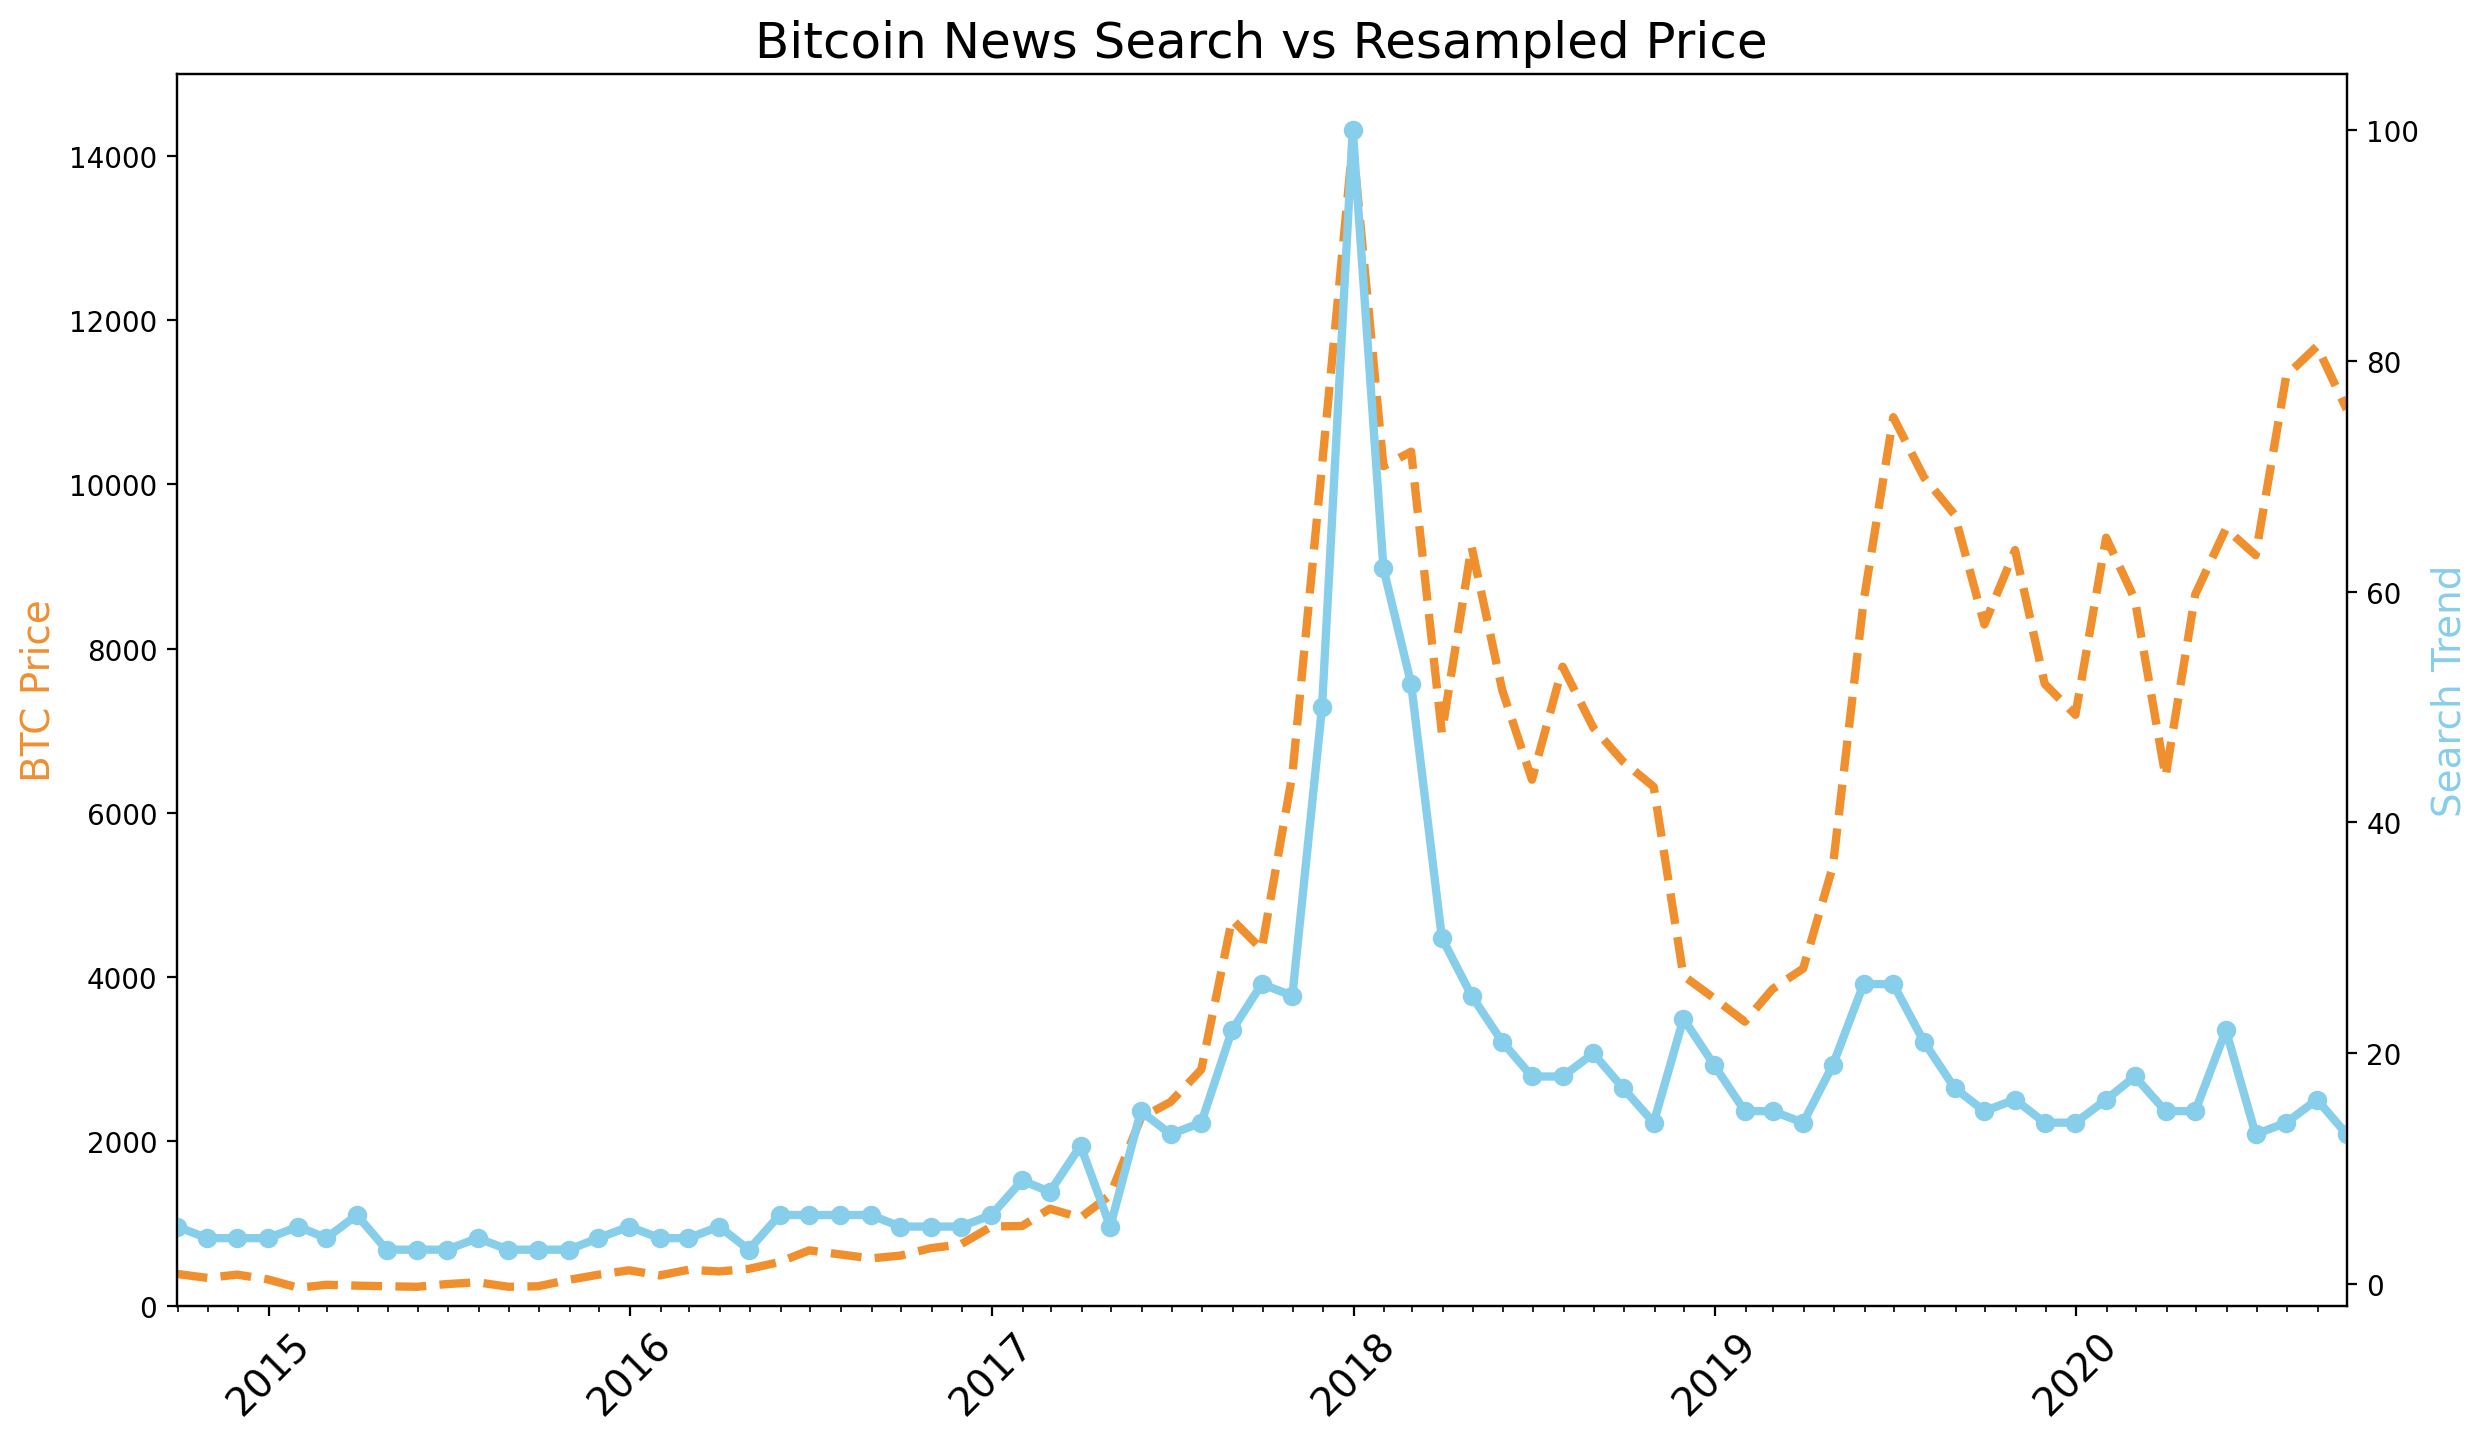

In [54]:
plt.figure(figsize = (14, 8), dpi = 200)
plt.title('Bitcoin News Search vs Resampled Price', fontsize = 18)

plt.xticks(fontsize = 14, rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('BTC Price', color = '#F08F2E', fontsize = 14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize = 14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)


ax1.set_ylim([0, 15000]) # ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_btc_monthly.index.min(), df_btc_monthly.index.max()])

ax1.plot(df_btc_monthly.index, df_btc_monthly.CLOSE, color = '#F08F2E', linewidth = 3, linestyle = '--')
ax2.plot(df_btc_monthly.index, df_btc_search.BTC_NEWS_SEARCH, color = 'skyblue', linewidth = 3, marker = 'o')

plt.show()

테슬라 때와 마찬가지로 2018년 초에 엄청난 가격 움직임이 매우 높은 검색량과 연관되어 있다. 2017년 말부터 2018년 초에는 모두가 비트코인에 대해 이야기했고, 이를 구입했기 때문에 검색량은 사상 최고치를 기록했다. 흥미로운 것은 2019년 1분기에도 역시 비트코인의 가격이 폭등했지만 이 시점의 검색량 증가는 크게 늘어나지 않았다.

# 데이터 시각화 - 실업: 격자 이용 방법

### 과제
1. 제목 변경 '미국의 월별 실업급여 검색 대 실업률'
2. y축 레이블 'FRED실업률' 로 변경
3. 축의 한계 설정
4. 회색 격자를 차트에 추가하여 연도와 실업률 더 잘 보일 수 있게, 선스타일은 점선
5. 검색그래프에서 계절성과 패턴 찾기

In [55]:
df_unemployment.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01-01,34,5.7
1,2004-02-01,33,5.6
2,2004-03-01,25,5.8
3,2004-04-01,29,5.6
4,2004-05-01,23,5.6


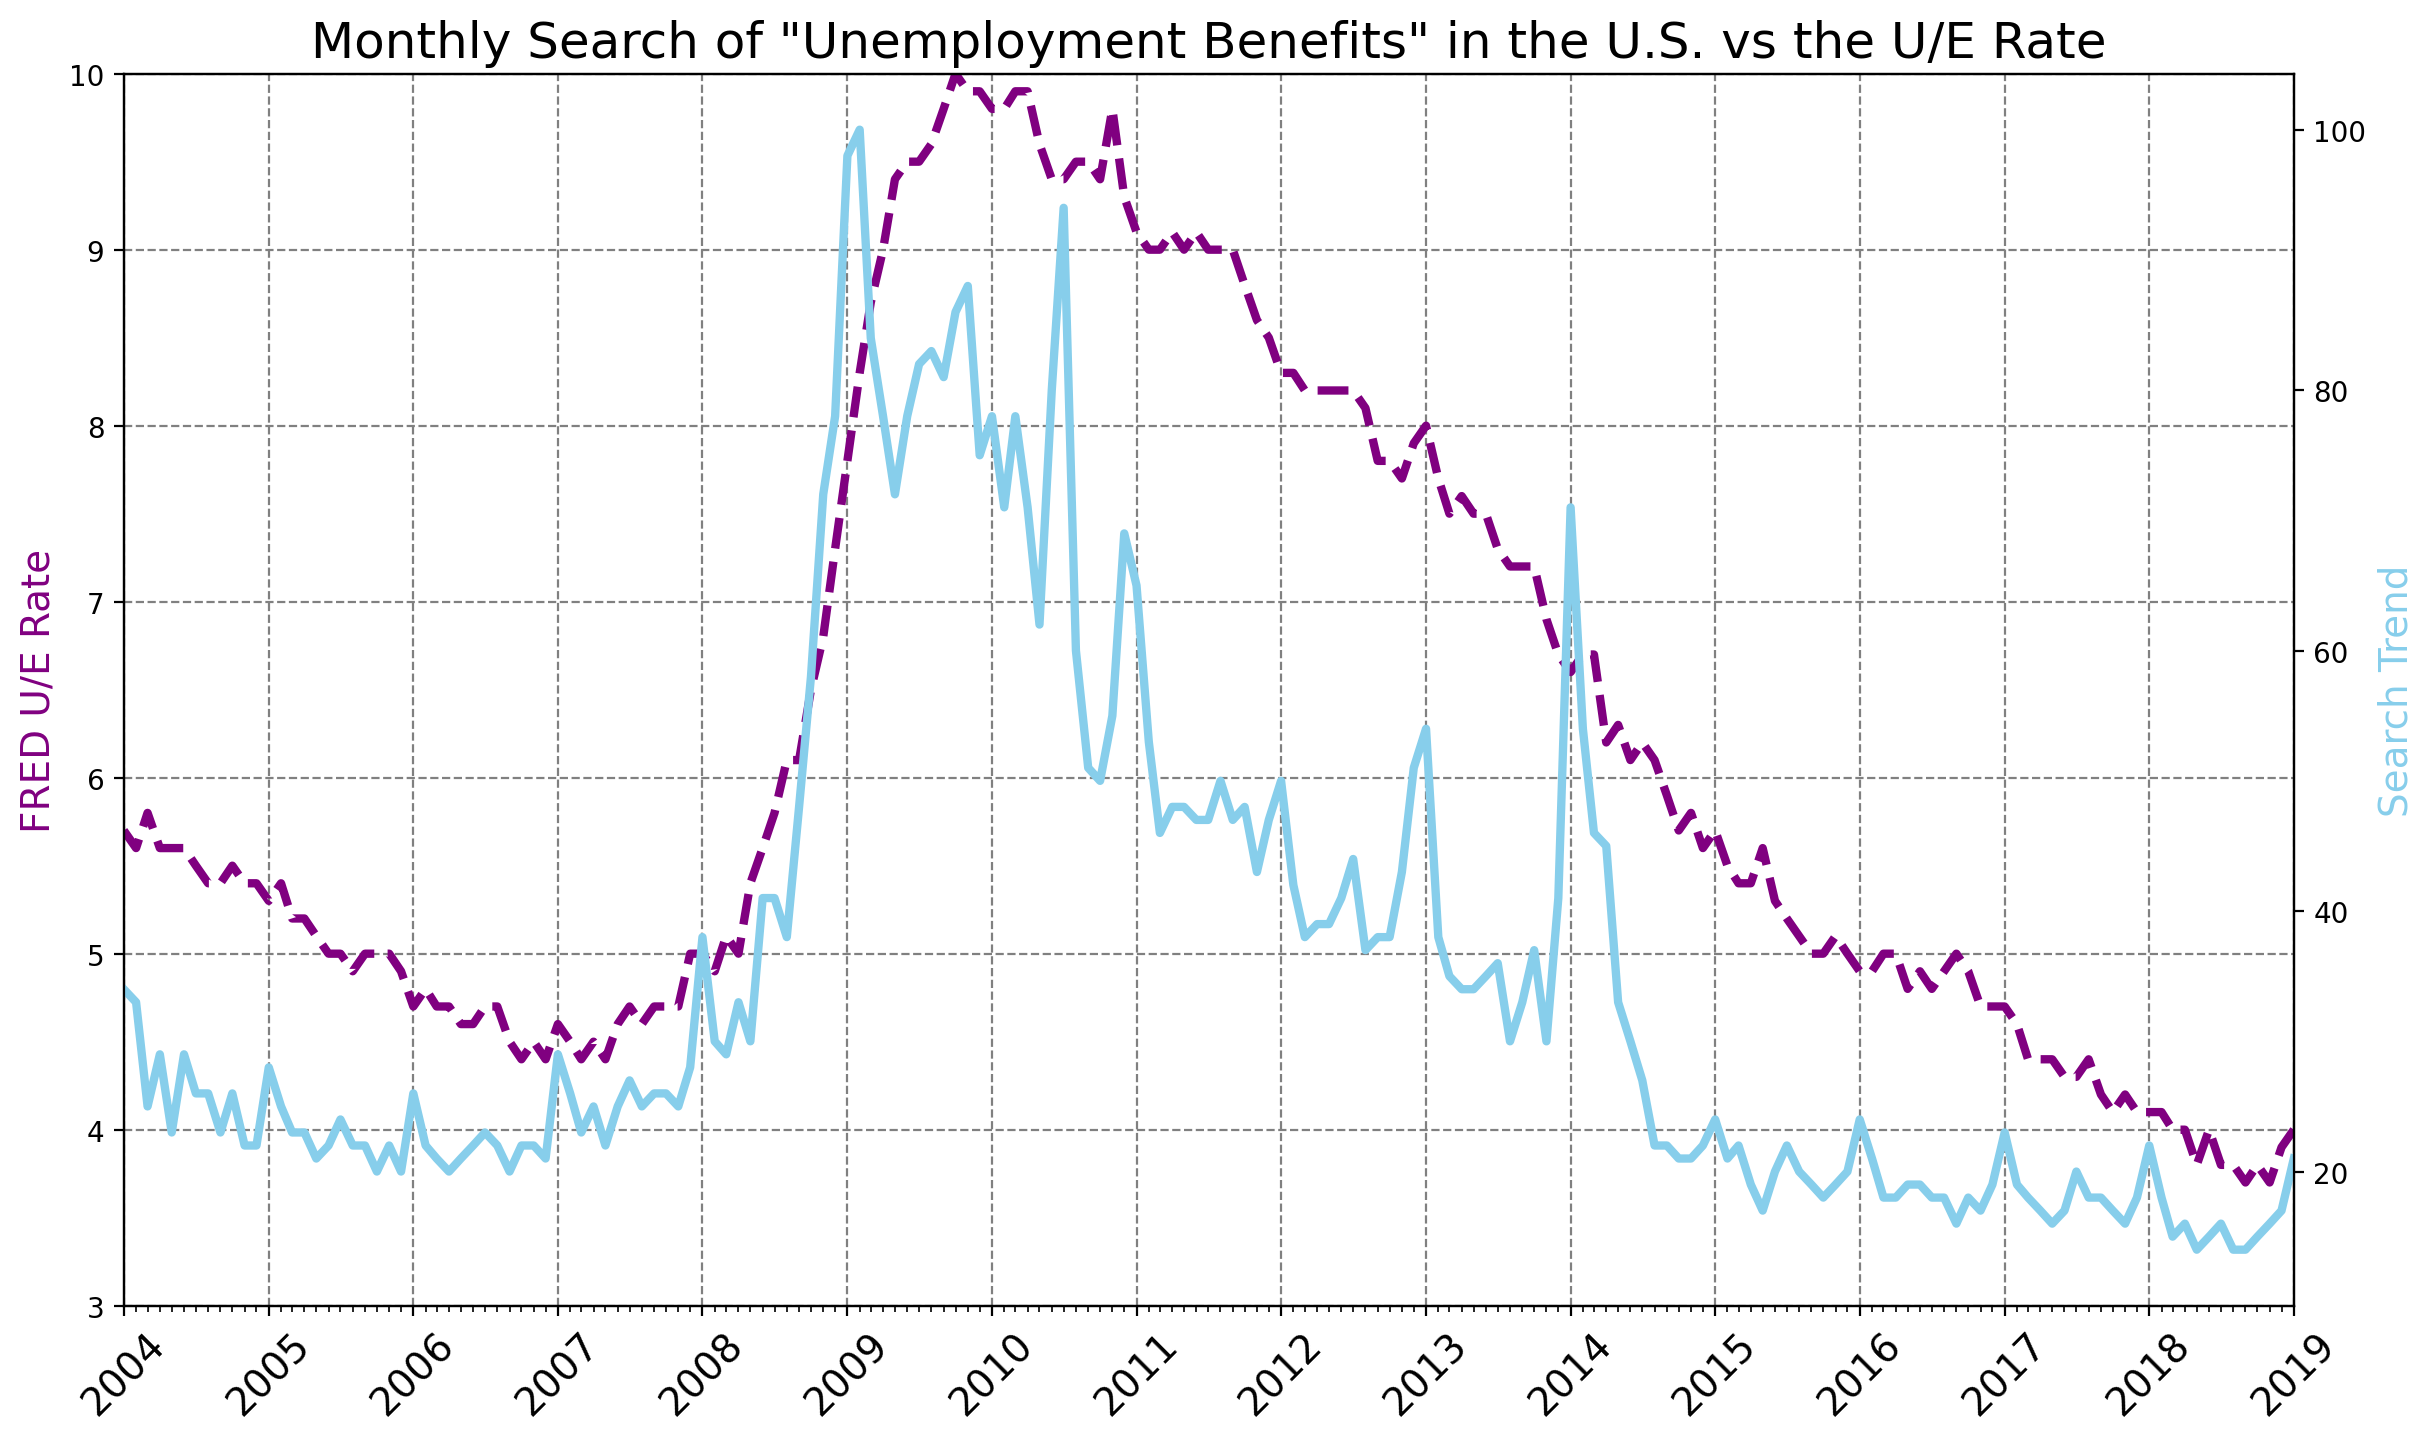

In [57]:
plt.figure(figsize = (14, 8), dpi = 200)
plt.title('Monthly Search of "Unemployment Benefits" in the U.S. vs the U/E Rate', fontsize = 18)

plt.xticks(fontsize = 14, rotation = 45)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color = 'purple', fontsize = 14)
ax2.set_ylabel('Search Trend', color = 'skyblue', fontsize = 14)

ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)


ax1.set_ylim([3, 10]) # ax1.set_ylim(bottom=0, top=15000)
ax1.set_xlim([df_unemployment.MONTH.min(), df_unemployment.MONTH.max()])

ax1.grid(color='grey', linestyle='--')

ax1.plot(df_unemployment.MONTH, df_unemployment.UNRATE, color = 'purple', linewidth = 3, linestyle = '--')
ax2.plot(df_unemployment.MONTH, df_unemployment.UE_BENEFITS_WEB_SEARCH, color = 'skyblue', linewidth = 3)

plt.show()

실업수당 검색량이 가파르게 올라가면서 실업률 역시 수직으로 올라가는 것을 명확하게 볼 수 있다. 대부분의 그래프 급등은 연말, 즉 12월에 있다. 이는 고용 시장에 계절성이 있다는 것을 보여준다. 

2007, 2008년의 금융위기가 엄청난 실업 급증을 야기했다는 것을 알 수있다. 실업률이 이 위기 이전과 비슷한 수준으로 내려갈 때까지 약 10년이 걸렸다.

2013년 말에 실업급여에 대한 검색량이 폭등했음에도 실업률은 크게 증가하지 않았다.

### 과제

웹 검색에 대해 3개월, 또는 6개월간의 연속적인 평균을 계산하고, 실제 실업률에 대한 6개월 연속 평균 검색량을 그림으로 표시

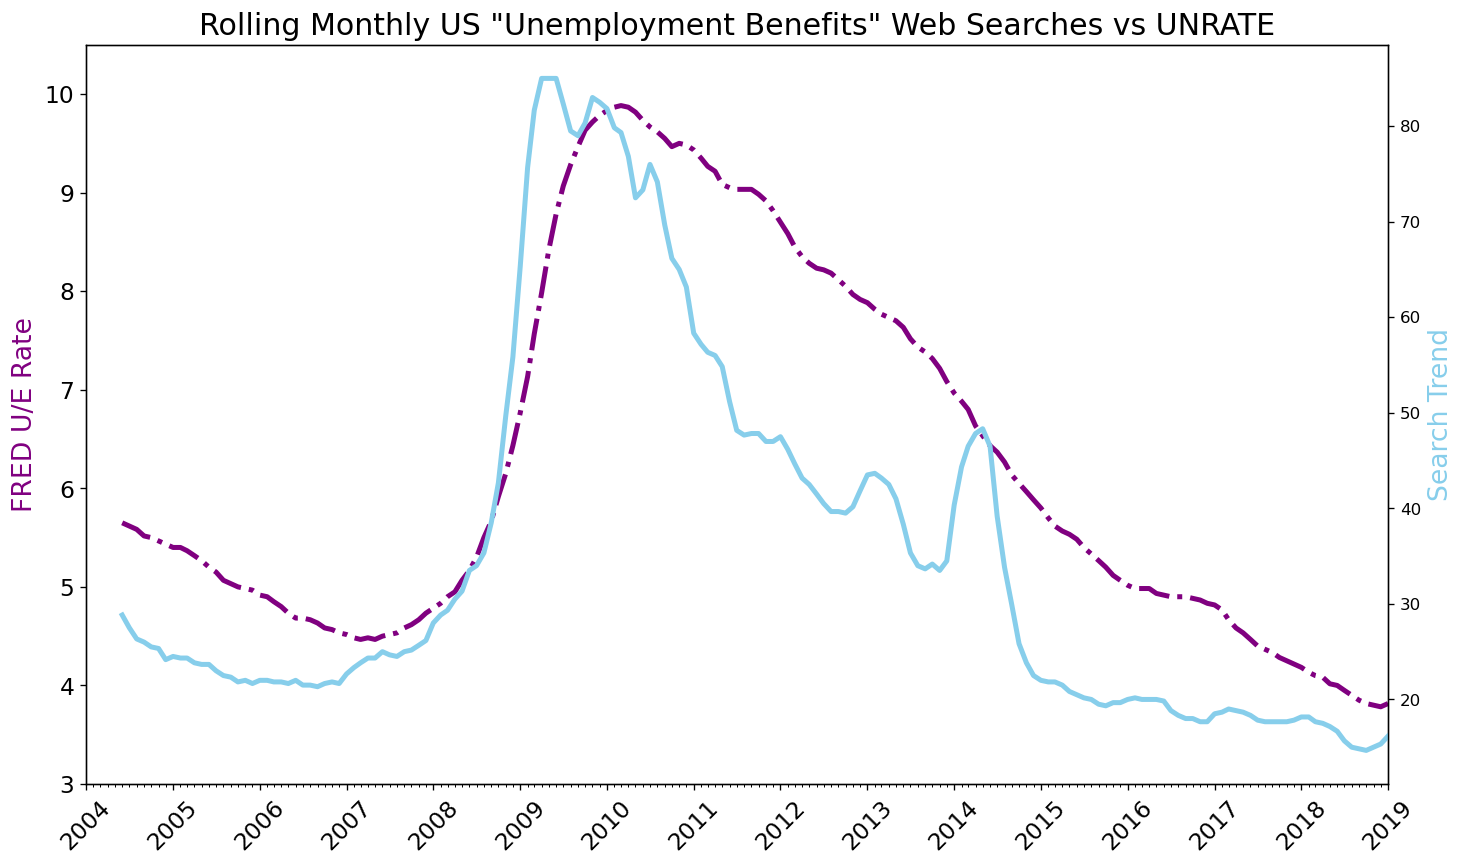

In [59]:
plt.figure(figsize=(14,8), dpi=120)
plt.title('Rolling Monthly US "Unemployment Benefits" Web Searches vs UNRATE', fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=14, rotation=45)
 
ax1 = plt.gca()
ax2 = ax1.twinx()
 
ax1.xaxis.set_major_locator(years)
ax1.xaxis.set_major_formatter(year_fmt)
ax1.xaxis.set_minor_locator(months)
 
ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_ylim(bottom=3, top=10.5)
ax1.set_xlim([df_unemployment.MONTH[0], df_unemployment.MONTH.max()])
 
roll_df = df_unemployment[['UE_BENEFITS_WEB_SEARCH', 'UNRATE']].rolling(window=6).mean()
 
ax1.plot(df_unemployment.MONTH, roll_df.UNRATE, 'purple', linewidth=3, linestyle='-.')
ax2.plot(df_unemployment.MONTH, roll_df.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

실업급여에 대한 검색은 실제로 공식 실업률이 올라가기 전에 이루어진다는 것을 알 수 있다. 마찬가지로 이 용어에 대한 검색 빈도는 실업률 감소 전에 먼저 내려간다. 다시 말해, 이런 검색은 실업률에 대한 선행 경제 지표로 작용하는 것으로 보인다.

# 데이터 시각화 - 실업:새로운 데이터에 대한 영향

In [60]:
df_ue_2020 = pd.read_csv('./data/UE Benefits Search vs UE Rate 2004-20.csv')
df_ue_2020.head()

,MONTH,UE_BENEFITS_WEB_SEARCH,UNRATE
0,2004-01,9,5.7
1,2004-02,8,5.6
2,2004-03,7,5.8
3,2004-04,8,5.6
4,2004-05,6,5.6


In [61]:
df_ue_2020.MONTH = pd.to_datetime(df_ue_2020.MONTH)

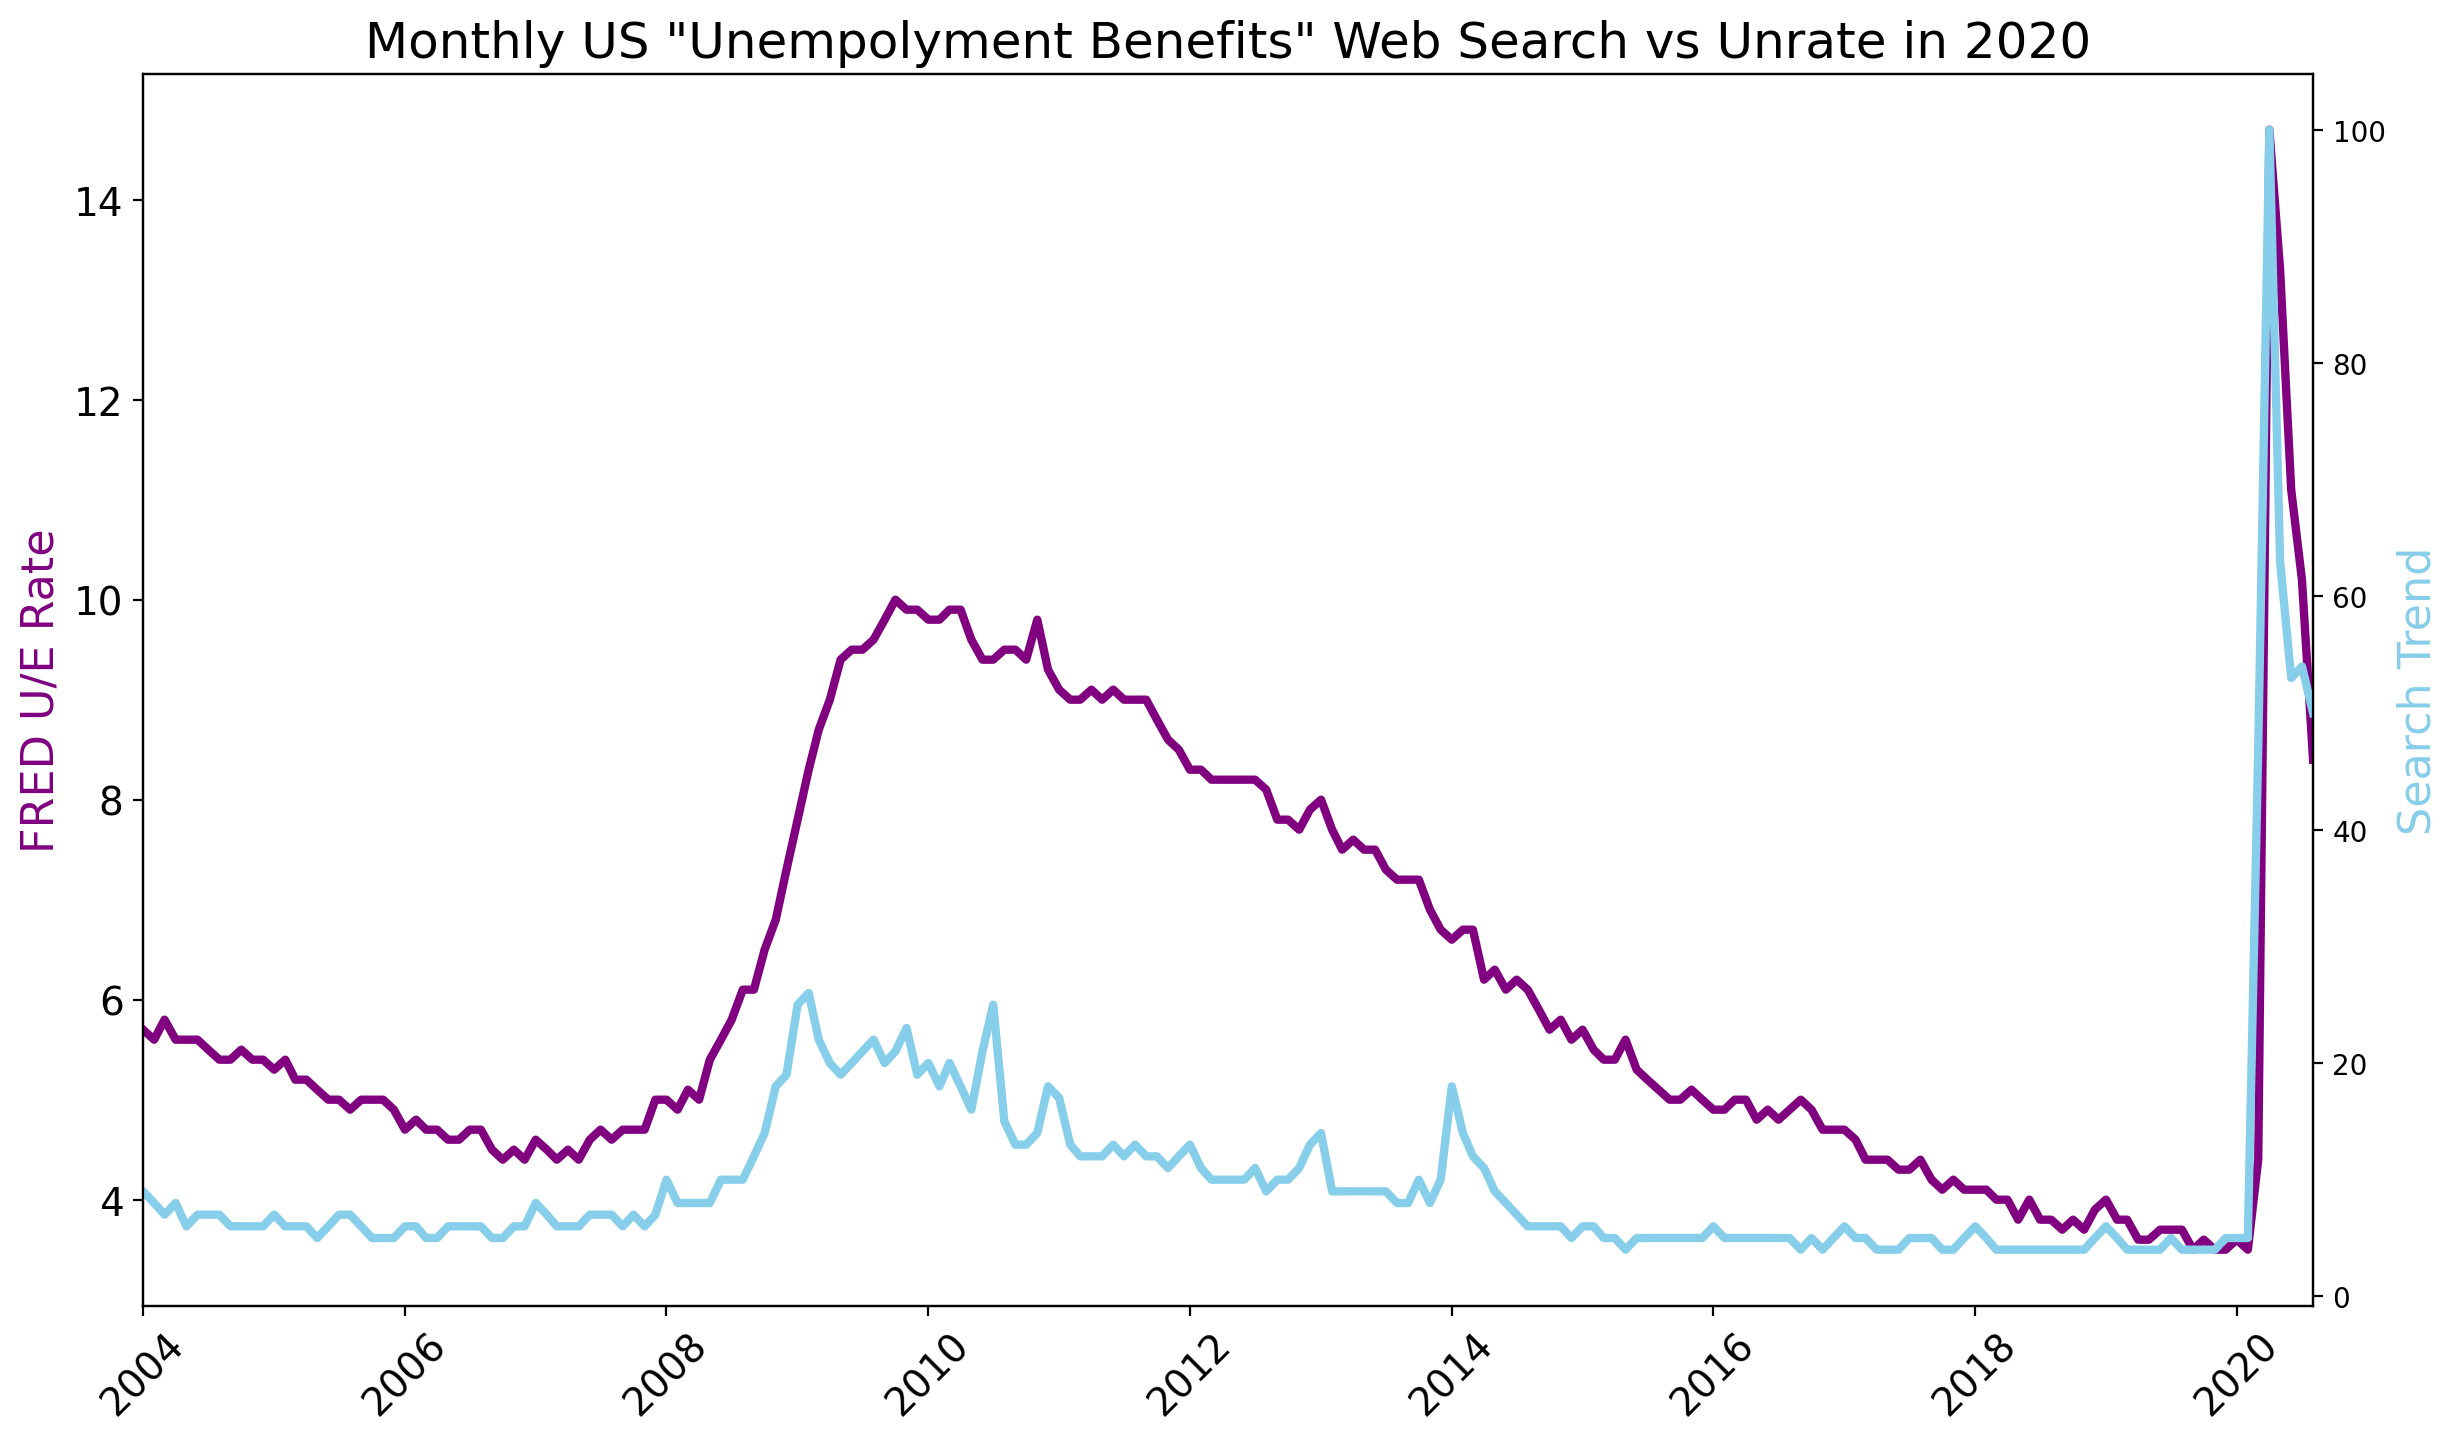

In [62]:
plt.figure(figsize = (14, 8), dpi = 200)
plt.yticks(fontsize = 14)
plt.xticks(fontsize = 14, rotation = 45)
plt.title('Monthly US "Unempolyment Benefits" Web Search vs Unrate in 2020', fontsize = 18)

ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.set_ylabel('FRED U/E Rate', color='purple', fontsize=16)
ax2.set_ylabel('Search Trend', color='skyblue', fontsize=16)
 
ax1.set_xlim([df_ue_2020.MONTH.min(), df_ue_2020.MONTH.max()])
 
ax1.plot(df_ue_2020.MONTH, df_ue_2020.UNRATE, 'purple', linewidth=3)
ax2.plot(df_ue_2020.MONTH, df_ue_2020.UE_BENEFITS_WEB_SEARCH, 'skyblue', linewidth=3)
 
plt.show()

미국의 실업률은 COVID 대유행 동안 전례없는 수준으로 치솟았고, 금융위기 때의 수준보다 더 악화되었다.